## Plots de distribuições

Vamos discutir alguns gráficos que nos permitem visualizar a distribuição de um conjunto de dados. Esses plots são:

- distplot
- jointplot
- pairplot
- rugplot
- kdeplot

In [1]:
# importando o seaborn
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# por padrão o seaborn já tem alguns datasets

tips = sns.load_dataset('tips')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [4]:
## informações sobre gorjetas dadas por clientes
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### distplot

plota um histograma com uma curva kde (kernel density estimation)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


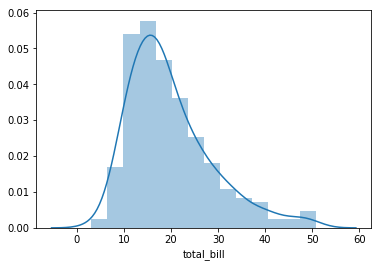

In [5]:
# distplot plota um histograma e uma curva kde

sns.distplot(tips['total_bill'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


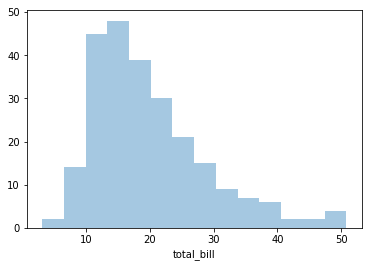

In [6]:
# tirando o a curva kde desse gráfico

sns.distplot(tips['total_bill'], kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


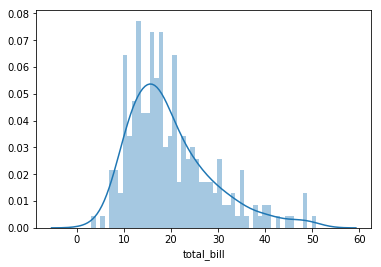

In [7]:
# alterando a largura das colunas

sns.distplot(tips['total_bill'], bins=50)

### jointplot

plota a distribuição de duas variáveis, o cruzamento de dois histogramas e o resultado num gráfico central. Serve para se verificar a relação entre as duas variáveis.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


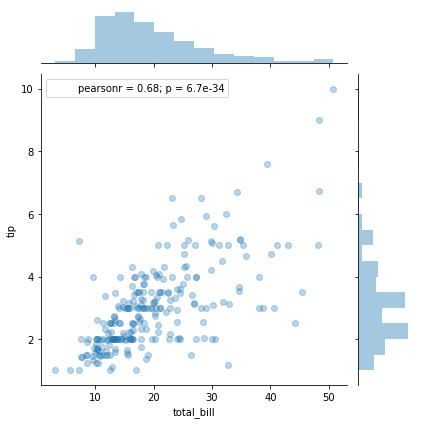

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, alpha=0.3)

Percebe-se visualmente, uma relação linear entre as duas variáveis.

Pode-se alterar o parâmetro kind e mudar o tipo de gráfico central
- scatter (padrão)
- reg
- hex
- resid
- kde

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


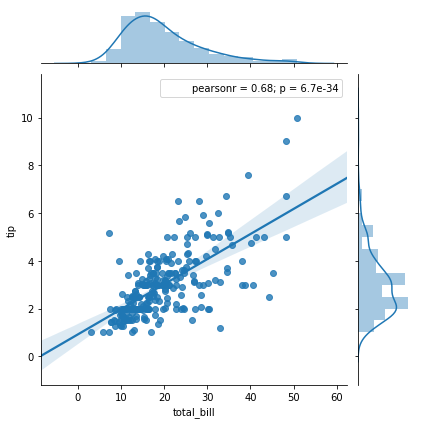

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


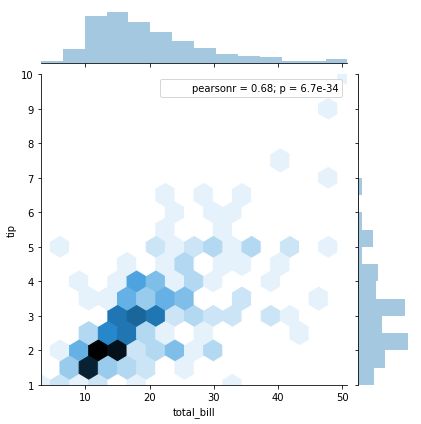

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

### pairplot

faz uma relação entre várias variáveis numéricas montando uma matriz de jointplots

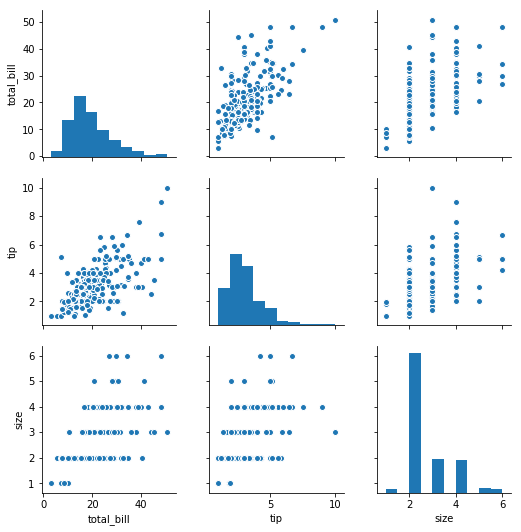

In [11]:
sns.pairplot(tips)

o parâmetro hue adiciona cores a variáveis categóricas

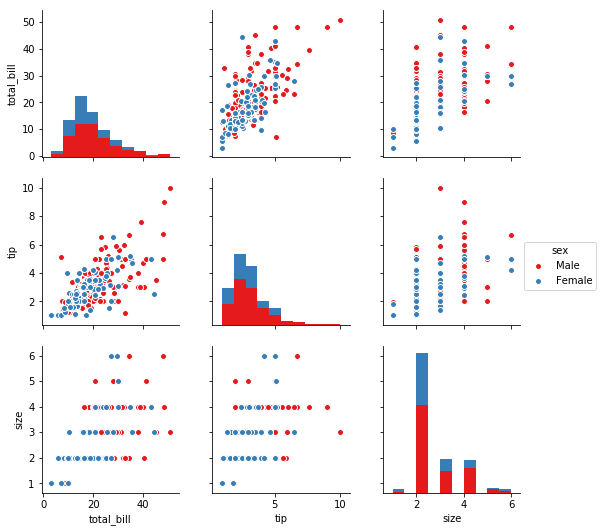

In [12]:
sns.pairplot(tips, hue='sex', palette='Set1')

### hugplot

É um método pouco usual sozinho, mas é base para construção da curva KDE. coloca um traço próximo ao eixo que representa a variável para cada amostra.

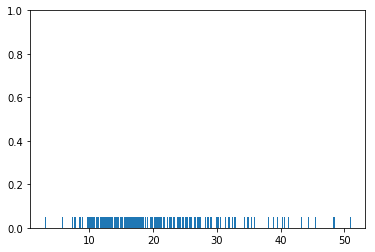

In [14]:
sns.rugplot(tips['total_bill'])

### KDE

É uma forma não paramétrica de estimar a função de densidade de probabilidade de uma variável aleatória.

Para se calcular, substitui-se cada amostra por uma curva gaussiana e depois efetua-se a soma das funções.

(0, 1)

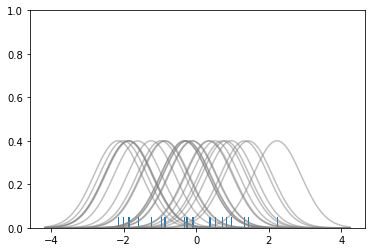

In [18]:
# Não se preocupe em entender ese código!
# É apenas para o diagrama abaixo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cria o dataset
dataset = np.random.randn(25)

# Cria outro rugplot
sns.rugplot(dataset)

# Configure o eixo dos x para o gráfico
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 pontos igualmente espaçados de x_min para x_max
x_axis = np.linspace(x_min, x_max, 100)

# Configure a largura de banda. Para obter informações sobre isso:
# http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Crie uma lista de kernel vazia
kernel_list = []

# Traça cada função de base
for data_point in dataset:
    
    # Crie um kernel para cada ponto e acrescente à lista
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Ajusta a escala para plotar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color = 'grey', alpha=0.5)
    
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

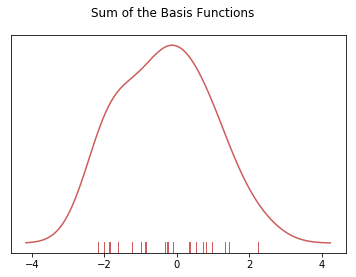

In [19]:
# Para obter o gráfico deo kde podemos somar essas funções de base.

# Traça a soma da função de base
sum_of_kde = np.sum(kernel_list, axis=0)

# Plota a figura
fig = plt.plot(x_axis, sum_of_kde, color='indianred')

# Adiciona o rugplot inicial
sns.rugplot(dataset, c='indianred')

# Livrar-se das marcas de "y-tick"

plt.yticks([])

# Define o título
plt.suptitle("Sum of the Basis Functions")

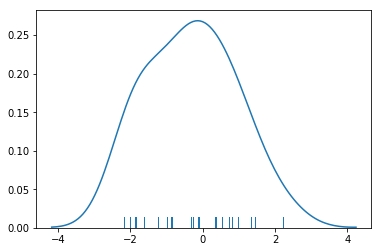

In [20]:
# chamando o método kdeplot que faz a curva kde de forma simplificada

sns.kdeplot(dataset)
sns.rugplot(dataset)

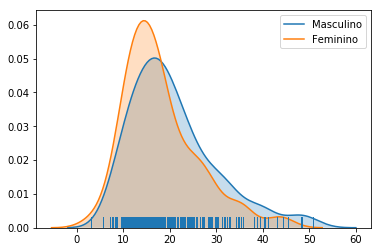

In [21]:
# kde do tips
sns.kdeplot(tips['total_bill'][tips['sex']=='Male'], shade=True, label='Masculino')
sns.kdeplot(tips['total_bill'][tips['sex']=='Female'], shade=True, label='Feminino')
sns.rugplot(tips['total_bill'])